In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

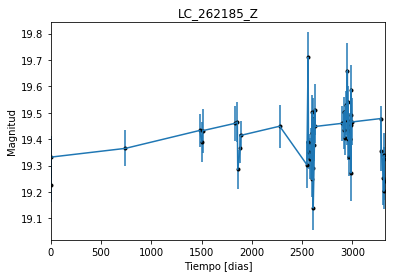

In [2]:
data = np.genfromtxt('LC_262185_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_262185_Z')
plt.savefig("LC_262185_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

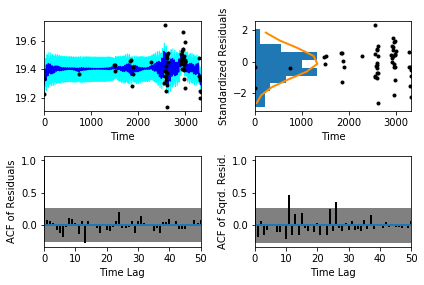

In [5]:
sample.assess_fit()

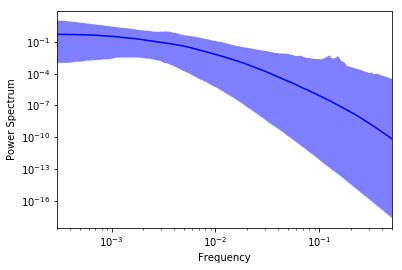

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

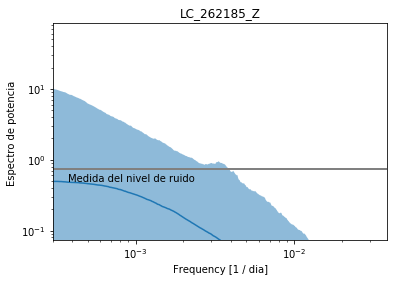

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_262185_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_262185_Z')

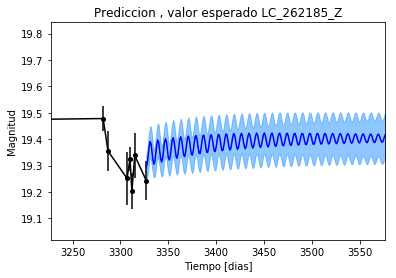

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_262185_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_262185_Z')

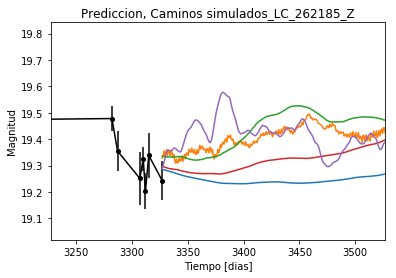

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_262185_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


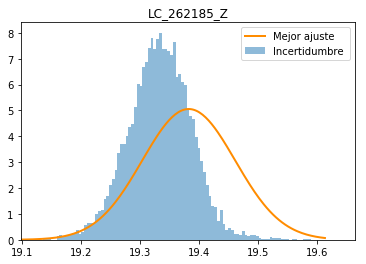

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_262185_Z')
plt.savefig("Mejor_ajuste_LC_262185_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_262185_Z')

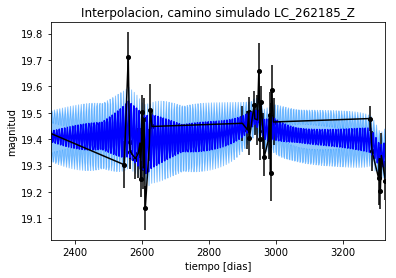

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_262185_Z')

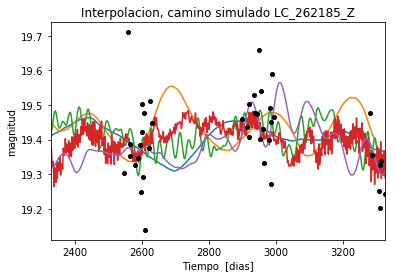

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 900.804927535
Median: 0.00976038273147
Standard deviation: 0.189472523622
68% credibility interval: [ 0.00086363  0.16530205]
95% credibility interval: [  3.63999979e-04   7.41140246e-01]
99% credibility interval: [  3.08126691e-04   9.28442502e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 665.363787853
Median: 0.00388041117637
Standard deviation: 0.0971753298377
68% credibility interval: [ 0.00067656  0.04712441]
95% credibility interval: [ 0.00034484  0.3228961 ]
99% credibility interval: [  3.07813796e-04   6.84492473e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1454.29703669
Median: 0.0414603953613
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 975.316486254
Median: 68.9302115483
Standard deviation: 1.5917767933
68% credibility interval: [ 67.19674308  70.05922517]
95% credibility interval: [ 64.75055836  70.91458605]
99% credibility interval: [ 62.66659688  71.92439111]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 848.273954319
Median: 0.972262913378
Standard deviation: 2.46318074355
68% credibility interval: [ 0.08287035  4.60702172]
95% credibility interval: [ 0.01654451  8.43497571]
99% credibility interval: [  1.01270670e-02   1.28985890e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1076.83537705
Median: 1.03595039481
Standard deviation: 10.6406095841
68% credibility interval: [  0.05155617  11.96366395]
95% credibility interval: [  1.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5117.28370619
Median: 4.24351384563e-28
Standard deviation: 125021938223.0
68% credibility interval: [  7.55374691e-75   2.51311699e-07]
95% credibility interval: [  1.13819240e-109   3.22871450e+005]
99% credibility interval: [  2.58078616e-142   4.55237366e+008]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2384.06025727
Median: 19.3944512743
Standard deviation: 0.0320380336782
68% credibility interval: [ 19.36587546  19.41800609]
95% credibility interval: [ 19.31881267  19.44628127]
99% credibility interval: [ 19.26968616  19.47425298]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 781.594092017
Median: 0.0607403310243
Standard deviation: 0.25213444766
68% credibility interval: [ 0.          0.43237666]
95% credibility interval: [ 0.          0.88899408]
99% credibility interval: [ 0.          0.98060492]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 781.594092017
Median: 0.0607403310243
Standard deviation: 0.25213444766
68% credibility interval: [ 0.          0.43237666]
95% credibility interval: [ 0.          0.88899408]
99% credibility interval: [ 0.          0.98060492]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 725.406170275
Median: 0.0
Standard deviation: 0.0384420366836
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 975.316486254
Median: 68.9302115483
Standard deviation: 1.5917767933
68% credibility interval: [ 67.19674308  70.05922517]
95% credibility interval: [ 64.75055836  70.91458605]
99% credibility interval: [ 62.66659688  71.92439111]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2614.03046825
Median: 0.00349116833872
Standard deviation: 0.00625411903495
68% credibility interval: [ 0.00150198  0.00756842]
95% credibility interval: [ 0.00048226  0.01934136]
99% credibility interval: [  7.13430868e-05   4.13482693e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2203.97633076
Median: 1.25570749915
Standard deviation: 0.196813909538
68% credibility interval: [ 1.08390187  1.46853639]
95% credibility interval: [ 0.93744621  1.70200455]
99% credibility interval: [ 0.85043776  1.87731645]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 817.510838956
Median: 0.000498260906201
Standard deviation: 0.402165967584
68% credibility interval: [  3.72399207e-06   2.17476711e-02]
95% credibility interval: [  5.06131326e-09   6.63578146e-01]
99% credibility interval: [  3.14091516e-12   1.76179182e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 900.804927535
Median: (-0.0613262933709-0.464329915577j)
Standard deviation: 1.98166143222
68% credibility interval: [-1.03862342+0.j         -0.00542636-3.55025729j]
95% credibility interval: [ -4.65672151e+00+0.j          -2.28707932e-03-1.03274153j]
99% credibility interval: [ -5.83357629e+00+0.j         -1.93601709e-03-5.7666305j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 665.363787853
Median: (-0.0243813424892+0j)
Standard deviation: 1.69779555012
68% credibility interval: [-0.29609141+0.j        -0.00425097+4.2417221j]
95% credibility interval: [-2.02881604+0.07578455j -0.00216672+0.01322761j]
99% credibility interval: [ -4.30079305e+00+3.69542159j  -1.93405112e-03+0.01060765j]
Posterior summary for paramet